**Bibliotecas**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

**Bases**

In [2]:
path = 'https://raw.githubusercontent.com/Tyra02/IA/main/jogarTenis.csv'
base = pd.read_csv(path)

In [3]:
base

,Aparência,Temperatura,Umidade,Ventando,Jogar
0,Sol,Quente,Alta,Não,Não
1,Sol,Quente,Alta,Sim,Não
2,Nublado,Quente,Alta,Não,Sim
3,Chuva,Agradável,Alta,Não,Sim
4,Chuva,Fria,Normal,Não,Sim
5,Chuva,Fria,Normal,Sim,Não
6,Nublado,Fria,Normal,Sim,Sim
7,Sol,Agradável,Alta,Não,Não
8,Sol,Fria,Normal,Não,Sim
9,Chuva,Agradável,Normal,Não,Sim


**Tratando a base**

In [5]:
X = base.copy()
Y = X.pop('Jogar')

In [6]:
encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [3])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6])], remainder='passthrough')
X = encoder.fit_transform(X)

encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')
X = encoder.fit_transform(X)

In [7]:
X

array([[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
       [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
       [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]], dtype=object)

**Separando treino e teste**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23)

**Treinando o modelo**

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

**Prevendo e mostrando resultados**

In [10]:
Y_pred = gnb.predict(X_test)
Y_pred

array(['Sim', 'Sim', 'Sim'], dtype='<U3')

In [11]:
Y_test

0    Não
1    Não
2    Sim
Name: Jogar, dtype: object

<Axes: >

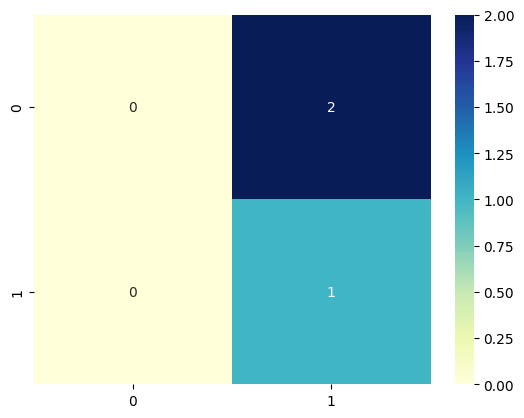

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
cm_matrix = pd.DataFrame(data=cm)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [13]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         Não       0.00      0.00      0.00         2
         Sim       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Prevendo uma instância**

Aparência = Chuva \
Temperatura = Fria \
Umidade = Normal \
Ventando = Sim \



In [14]:
test = [[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]]
pred = gnb.predict(test)
pred

array(['Não'], dtype='<U3')